# Spacecraft Dynamics Capstone: Mars Mission


## Task 1: Orbit Simulation

Assume the general orbit frame $\mathcal O =\{\pmb\iota_r, \pmb\iota_{\theta},\pmb\iota_h\}$. This allows the position vector on a circular orbit to be written as $\pmb r= r\pmb\iota_r$ where $r$ is here a constant radius. Your tasks are:

1. Derive the inertial spacecraft velocity vector $\dot{\pmb r}$. Note that for a circular orbit $\dot\theta$ is constant

2. Write a function whose inputs are the radius $r$ and the $(3-1-3)$ Euler angles $(\Omega, i, \theta)$ and the outputs are the inertial position vector $^N \pmb r$ and the inertial velocity vector $^N \dot{\pmb r}$ of the associated circular orbit.

3. Confirm the operation of this program by entering the inertial position and velocity vector results for $(r_{LMO},\Omega_{LMO},i_{LMO}, \theta_{LMO})$ at time 450 seconds.

For this problems we use the function pos_vel(h, euler,t) implemented in the file MArsMission.py

In [1]:
import numpy as np
from DCMmatrix import *
from MarsMission import *
import matplotlib.pyplot as plt

### For the LMO orbit at time 450 sec:

In [2]:
Omega, i, theta0 = 20,30,60 #in deg
h = 400  # in km
r_LMO, v_LMO = pos_and_vel(h, (Omega, i, theta0),450)
print('The inertial position and velocity vectors are at time t = 450s : ', r_LMO, v_LMO)

The inertial position and velocity vectors are at time t = 450s :  [-669.28508994 3227.49826592 1883.18106617] [-3.2559645  -0.79778654  0.21011585]


##### For the GMO orbit at time 1150 sec:

In [3]:
r_GMO = 20424.2
h_GMO = r_GMO - R_m
Omega_GMO, i_GMO, theta0_GMO = 0, 0, 250
r_vec_GMO, rdot_GMO = pos_and_vel(h_GMO, (Omega_GMO, i_GMO, theta0_GMO), 1150)
print('The inertial position and velocity vectors are at time t = 1150s : ', r_vec_GMO, rdot_GMO)

The inertial position and velocity vectors are at time t = 1150s :  [ -5399.15037424 -19697.64252078      0.        ] [ 1.396568   -0.38280117  0.        ]


In [4]:
import math

math.acos(np.dot(r_LMO, r_vec_GMO)/(norm(r_LMO)*norm(r_vec_GMO)))*180/np.pi

140.655100797196

## Task 2: Orbit Frame Orientation

Let Hill frame $H=\{\hat{\pmb\iota}_r, \hat{\pmb\iota}_{\theta},\hat{\pmb\iota}_h\}$ be the orbit frame of the LMO satellite. These base vectors are generally
defined as
$$
\hat{\pmb\iota}_r = \frac{\pmb r_{LMO}}{|\pmb r_{LMO}|},\ \ \ \ \hat{\pmb\iota}_{\theta}=\hat{\pmb\iota}_h\times\hat{\pmb\iota}_r,\ \ \ \  \hat{\pmb\iota}_{h}=\frac{\pmb r_{LMO}\times\dot{\pmb r}_{LMO}}{|\pmb r_{LMO}\times\dot{\pmb r}_{LMO}|}
$$

1. Determine an analytic expressions for the matrix $HN$
2. Write a function whose input is simply time t, and the output is the DCM $HN(t)$
3. Validate the operation of this function by computing $HN(300s)$

The matrix $HN(t)$ is simply the matrix whose rows are the vectors of the frame $H$ written in the $N$ frame, i.e
$$
HN(t) = \begin{bmatrix} \hat{\pmb\iota}_r^T(t)\\ \hat{\pmb\iota}_{\theta}^T(t)\\ \hat{\pmb\iota}_{h}^T(t)
\end{bmatrix}
$$
this vectors can be computed using the function implemented in task 1 which returns $\pmb r_{LMO},\dot{\pmb r}_{LMO}$

In [5]:
Omega_LMO, i_LMO, theta0_LMO = 20,30,60 #in deg
h_LMO = 400  # in km
t = 300 # in sec
HN = DCM_HN(t)
print('The DCM matrix HN is: ', HN)

The DCM matrix HN is:  [[-0.0464774   0.87414792  0.48343072]
 [-0.98417245 -0.12292213  0.12765086]
 [ 0.17101007 -0.46984631  0.8660254 ]]


## Task 3: Sun-Pointing Reference Frame Orientation 

To point the spacecraft solar panels axis $\hat{\pmb b}_3$ at the sun, the reference frame $R_s$ must be chosen such that $\hat{\pmb r}_3$ axis points in the sun direction ($\hat{\pmb n}_2$ in this scenario). Further, assume the first axis $\hat{\pmb r}_1$ points in the $-\hat{\pmb n}_1$ direction.Your tasks are:

1. Determine an analytic expressions for the sun pointing reference frame $R_s$ by defining the DCM $R_sN$

2. Write a function that returns $R_sN$

3. Validate the evaluation of $R_sN$ by providing the numerical values for $t=0 s$

4. What is the angular velocity $^N\pmb\omega_{R_s/N}$?


## 
$R_s = \{r_1,r_2,r_3\} = \{-\hat{n}_1, \hat{n}_3,\hat{n}_2\}$. Then the matrix $R_s = \begin{bmatrix} r_1^T\\ r_2^T\\ r_3^T\end{bmatrix}$
Then the matrix $R_sN(t)$ is computed by :
$$
R_sN = (R_sH)(HN(t)),\ \ \ \text{with } R_sH =R_s@H
$$
the matrix $H$ is a matrix whose column vectors are the vectors of the hill frame, this matrix coincides with $HN(t)^T$

so in the end $R_sN = R_s=\begin{bmatrix}\hat{-n}_1^T \\ \hat{n}_3^T\\ \hat{n}_2^T\end{bmatrix}=\begin{bmatrix} -1 & 0 & 0\\ 0 &0&1 \\ 0&1&0\end{bmatrix}$ which is constant in time.

The angular velocity of fram $R_s$ with respect to $N$ is $0$.



In [6]:
RsN = R_sN() 
print(RsN)

[[-1  0  0]
 [ 0  0  1]
 [ 0  1  0]]


## Task 4: Nadir-Pointing Reference Frame Orientation (10 points)

To point the spacecraft sensor platform axis $\hat{b}_1$ towards the center of Mars or nadir direction, the reference frame $R_n$ must be chosen such that $\hat{r}_1$ axis points towards the planet. Further, assume the second axis $\hat{r}_2$ points in the velocity direction $\hat{\pmb\iota}_{\theta}$ . Your tasks are:

1. Determine an analytic expressions for the nadir pointing reference frame $R_n$ by defining the DCM $R_nN$

2. Write a function that returns $R_nN$ as a function of time.

3. Write a function that determines the angular velocity vector $^N\pmb\omega_{R_n/N}$.

4. Validate the evaluation of $R_nN$ by providing the numerical values for $t = 330s$.

5. What is the angular velocity $^N\pmb\omega_{R_n/N}(330s)$?

solution:

1.$R_nN = R_nH @ HN(t)$ but 
$$
R_nH =\begin{bmatrix}-\hat{\pmb\iota}_r^T\\ \hat{\pmb\iota}_{\theta}^T\\ -\hat{\pmb\iota}_h.T \end{bmatrix}\begin{bmatrix}\hat{\pmb\iota}_r^T & \hat{\pmb\iota}_{\theta}^T & \hat{\pmb\iota}_h.T \end{bmatrix}=
$$ 


2. To compute the angular velocity $w_{Rn/N}$ in the frame $N$:
$$
^Nw_{RnN} = ^Nw_{Rn/H} + ^Nw_{H/N}
$$
but $^N w_{Rn/H}=0$ then 
$$
^Nw_{Rn/N} = ^Nw_{H/N} = (HN^T)^Hw_{H/N} 
$$
with $H^ w_{H/N} = \dot{\theta}\hat{\pmb\iota}_h$

then: 

In [7]:
RnN = R_nN(330)
print('The DCM matrix $R_nN$ at time 330 seconds is = ', RnN)
NwRnN = N_w_RnN(330)
print('the angular velocity of R_n relative to N in the N frame is: ,', NwRnN)

The DCM matrix $R_nN$ at time 330 seconds is =  [[ 0.07258174 -0.87057754 -0.48664837]
 [-0.98259221 -0.1460794   0.11477527]
 [-0.17101007  0.46984631 -0.8660254 ]]
the angular velocity of R_n relative to N in the N frame is: , [ 0.00015131 -0.00041572  0.00076626]


## Task 5: GMO-Pointing Reference Frame Orientation

To point the nano-satellite communication platform axis $−\hat{\pmb b}_1$ towards the GMO mother spacecraft, the communication reference frame $R_c$ must be chosen sucht hat $−\hat{\pmb r}_1$ axis points towards the GMO satellite location. Assume $\Delta\pmb r = \pmb r_{GMO} -\pmb r_{LMO}$. Further, to fully define a three-dimensional reference frame, assume the second axis is defined as

$$
\hat{\pmb r}_2 = \frac{\Delta\pmb r\times \hat{\pmb n}_3}{|\Delta\pmb r\times \hat{\pmb n}_3|}
$$

while the third is then defined as $\hat{\pmb r}_3 = \hat{\pmb r}_1\times\hat{\pmb r}_2$. Your tasks are:

1. Determine an analytic expressions for the communication mode reference frame $R_c$ by defining the DCM $R_cN$.

2. Write a function that returns $R_cN$ as a function of time.

3. Write a function that determines the angular velocity vector $^N\omega_{Rc/N}$. Note that an analytical expression for this body rate vector is very challenging. It is ok to use numerical differences in these frames to compute $\frac{d(R_cN)}{dt}$, and then relate this to $\omega_{R_c/N}$. As the orbit trajectories are given as a function of time, it is straight forward to include a time-based numerical difference method.

4. Validate the evaluation of $R_cN$ by providing the numerical values for $t = 330s$.

5. Validate the angular velocity $^N\omega_{Rc/N}(330s)$.

In [8]:
RcN = R_cN(330)
print('The DCM matrix RcN at t= 330s is: \n', RcN)

The DCM matrix RcN at t= 330s is: 
 [[ 0.26547539  0.96092816  0.07835742]
 [-0.96389181  0.26629415  0.        ]
 [-0.02086612 -0.07552807  0.99692533]]


In [9]:
print('check if is orthogonal or nearly: \n', RcN@RcN.T)

check if is orthogonal or nearly: 
 [[1.00000000e+00 0.00000000e+00 1.38777878e-17]
 [0.00000000e+00 1.00000000e+00 3.46944695e-18]
 [1.38777878e-17 3.46944695e-18 1.00000000e+00]]


In [10]:
w = N_w_RcN(330)
print('The angular velocity is : ', w)

The angular velocity is :  [ 1.97828967e-05 -5.46541194e-06  1.91300007e-04]


## Task 6: Attitude Error Evaluation

Any attitude feedback control algorithm requires the ability to compute the attitude and angular velocity tracking errors of the current body frame $B$ relative to the reference frame $R$. Your tasks are:

1. Write a function that has the inputs of time, the current body attitude states $\pmb\sigma_{B/N}$ and $^B\pmb\omega_{B/N}$, as well as the current references frame orientation $RN$ and rates $N^\pmb\omega_{R/N}$, and returns the associated tracking errors $\pmb\sigma_{B/R}$ and $B^\pmb\omega_{B/R}$.

2. Validate this function by computing $\pmb\sigma_{B/R}$ and $B^\pmb\omega_{B/R}$ at the initial time $t_0$ for the sun-pointing, nadir pointing and GMO reference orientations above. Just compute the LMO tracking errors at $t_0$, with the initial conditions given in section 3.1, for the three reference frames at the initial time.


in the file MarsMission.py we've implemented this function, now we used for the sun-pointing, nadir and the GMO reference to complete parts 1,2,3,4 of this task.

The initial conditions are:

$$
\pmb\sigma_{B/N}(t_0) = \begin{bmatrix}0.3\\ -0.4 \\ 0.5\end{bmatrix},\ \ \ \  ^B\pmb\omega_{B/N}(t_0) =\begin{bmatrix} 1.0 \\ 1.75 \\ -2.20\end{bmatrix}\deg/s
$$

The rigid LMO spacecraft inertia tensor is given by:
$$
^BI = ^B\begin{bmatrix}10&0&0\\0&5&0\\0&0&7.5\end{bmatrix}kgm^2
$$

### For sun-pointing reference (power mode):

$$
RN = R_sN(), \ \ ^Nw_{R/N} = (0,0,0)
$$
and initial $\pmb\sigma_{B/N}, ^B\pmb\omega_{B/N}$ given above:

In [11]:
RN_sun = R_sN()
N_w_RN_sun = np.zeros(3)
s_BN0 = np.array([0.3, -0.4, 0.5])
B_w_BN0 = np.array([1.0, 1.75, -2.20])*np.pi/180 #in degrees

sun_sbr, sun_rates = tracking_errors(s_BN0, B_w_BN0, RN_sun, N_w_RN_sun)

In [12]:
print('The tracking errors for the Sun Pointing reference are: \n', '$\sigma_{B/R}= $ ',sun_sbr, '\n $^B\omega_{B/R} = $', sun_rates)

The tracking errors for the Sun Pointing reference are: 
 $\sigma_{B/R}= $  [-0.77542077 -0.47386825  0.04307893] 
 $^B\omega_{B/R} = $ [ 0.01745329  0.03054326 -0.03839724]


### For nadir-pointing reference (science mode):

$$
RN = \text{R_nN(t_0)}, \ \ ^N\omega_{R/N} = \text{N_w_RnN}(t_0)
$$
and the same initial condtions for the attitude of body frame and rates as above.

In [13]:
RN_nadir = R_nN(0)
N_w_RN_nadir = N_w_RnN(0)
s_BN0 = np.array([0.3, -0.4, 0.5])
B_w_BN0 = np.array([1.0, 1.75, -2.20])*np.pi/180 #in radians

nadir_sbr, nadir_rates = tracking_errors(s_BN0, B_w_BN0, RN_nadir, N_w_RN_nadir)

In [14]:
print('The tracking errors for the Nadir Pointing reference are: \n', '$\sigma_{B/R}= $ ',nadir_sbr, '\n $^B\omega_{B/R} = $', nadir_rates)

The tracking errors for the Nadir Pointing reference are: 
 $\sigma_{B/R}= $  [0.26226523 0.55470457 0.03942405] 
 $^B\omega_{B/R} = $ [ 0.01684883  0.03092879 -0.03891576]


### For GMO- pointing reference (communication mode):

$$
RN = \text{R_cN(0)}, \ \ ^B\omega_{R/N} =\text{N_w_RcN(0)}
$$
and the same initial condtions for the attitude of body frame and rates as above.

In [15]:
RN_GMO = R_cN(0)
N_w_RN_GMO = N_w_RcN(0)
s_BN0 = np.array([0.3, -0.4, 0.5])
B_w_BN0 = np.array([1.0, 1.75, -2.20]) #in degrees

GMO_sbr, GMO_rates = tracking_errors(s_BN0, B_w_BN0, RN_GMO, N_w_RN_GMO)

In [16]:
print('The tracking errors for the GMO Pointing reference are: \n', '$\sigma_{B/R}= $ ',GMO_sbr, '\n $^B\omega_{B/R} = $', GMO_rates)

The tracking errors for the GMO Pointing reference are: 
 $\sigma_{B/R}= $  [ 0.01697198 -0.38280275  0.2076131 ] 
 $^B\omega_{B/R} = $ [ 0.9998438   1.75011418 -2.20003963]


## Task 7: Numerical Attitude Simulator

In order to integrate the attitude you need a numerical integrator. The LMO and GMO orbit satellite positions are given already as a function of time from your earlier tasks. Let the propagated attitude
state $X$ be
$$
X =\begin{bmatrix}\pmb\sigma_{B/N}\\ ^B\pmb\omega_{B/N}\end{bmatrix}
$$

Assume that the spacecraft is rigid and its dynamics obey

$$
I\dot{\pmb\omega}_{B/N} = -[\tilde{\pmb\omega}_{B/N}]I\pmb\omega_{B/N} +\pmb u
$$

where u is your external control torque vector. Your tasks are:

1. Write an RK4 integrator using your programing language of choice (i.e., do not use a built-in integrator such as Matlab’s ode45). Make sure your time step is chosen small enough such that numerical integrator errors are not visible in your simulation result plots. With RK4 it is ok to use a fixed integration time step of 1 second. Further, hold the control u vector piece-wise constant over the RK4 integration to the next time step. You can updated the control u at every time step in advance fo the RK4 integration step.

2. Demonstrate that your integrator works properly by integrating $X$ forward for 500 seconds with $u = 0$. Provide $H = [I]\pmb\omega_{B/N}$ at $500s$ and express the $H$ vector in the $B$ frame.

3. Provide the rotational kinetic energy $T = \frac{1}{2}\pmb\omega_{B/N}^T[I]\pmb\omega_{B/N}$ at $500$ seconds.

4. Provide the MRP attitude $\pmb\sigma_{B/N}(500s)$.

5. Provide angular momentum vector $^N\pmb H(500s)$ in inertial frame components.

6. If you apply a fixed control torque $^B\pmb u = (0.01, −0.01, 0.02) Nm$, provide the attitude $\pmb\sigma_{B/N}(t = 100s)$.


In [17]:
I = np.diag([10, 5, 7.5]) 
s_BN0 = np.array([0.3, -0.4, 0.5])
B_w_BN0 = np.array([1.0, 1.75, -2.20])*np.pi/180 #in degrees. Initial condition for w_BN
x0 = np.hstack((s_BN0, B_w_BN0)) # initial condition for state x
u = np.zeros(3)
tspan = (0,510) # seconds
step = 1 # second

X = RG4(xdot, tspan, x0, step, u, I)

In [18]:
s_bn = X[0:3,500]
w_bn = X[3:, 500]
H = I@w_bn
T = 0.5*np.dot(w_bn, I@w_bn)
BN = MRP_to_DCM(s_bn)
N_H = BN.T@H
print('The following iscomputed with control law u = ', u)
print('THe momentum vector at t=500s in the B frame is H= ', H)
print('The rotational kinetic energ is T= ', T)
print('Attitude of body relative to N at t=500s is: ', s_bn)
print('Angular velocity of B relative to N at t=500s is : ', w_bn)
print('THe momentum vector at t=500s in the N frame is H= ', N_H)


The following iscomputed with control law u =  [0. 0. 0.]
THe momentum vector at t=500s in the B frame is H=  [ 0.1378972   0.13266205 -0.31638781]
The rotational kinetic energ is T=  0.009384120387923595
Attitude of body relative to N at t=500s is:  [ 0.13765932  0.56027024 -0.03217282]
Angular velocity of B relative to N at t=500s is :  [ 0.01378972  0.02653241 -0.04218504]
THe momentum vector at t=500s in the N frame is H=  [-0.2641265   0.25278185  0.05526875]


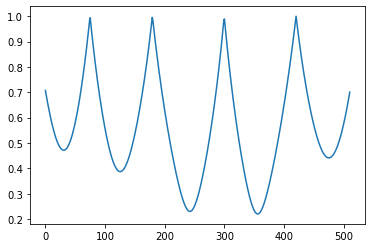

In [19]:
plt.plot(np.arange(0,511,1), norm(X[0:3,:],2,0))

### If we apply a fixed control torque:

$$
^B\pmb u = (0.01, -0.01, 0.02) Nm
$$
Provide the attitude $\pmb\sigma_{B/N}(100s)

In [20]:
I = np.diag([10, 5, 7.5]) 
s_BN0 = np.array([0.3, -0.4, 0.5])
B_w_BN0 = np.array([1.0, 1.75, -2.20])*np.pi/180 #in degrees. Initial condition for w_BN
x0 = np.hstack((s_BN0, B_w_BN0)) # initial condition for state x
u = np.array([0.01, -0.01, 0.02])
tspan = (0,110) # seconds
step = 1 # second

X_u = RG4(xdot, tspan, x0, step, u, I)

In [21]:
s_bn_u = X_u[0:3,100]
print('The attitude $\sigma_B/N(100s)$ is: ', s_bn_u)

The attitude $\sigma_B/N(100s)$ is:  [-0.22686111 -0.64138601  0.2425498 ]


In [22]:
X_u.shape
np.arange(0,111,1).shape

(111,)

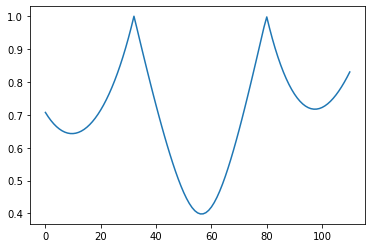

In [23]:
S_bn_u = X_u[0:3,:]
plt.plot(np.arange(0,111,1), norm(S_bn_u,2,0))

## Task 8: Sun Pointing Control

First the individual control pointing modes are developed and tested on their own. Next they are com- bined into a full mission scenario simulation in section 4.11. In the current task, use the initial spacecraft attitude and orbit conditions in section 1.8 and Table below

<table>
    <caption>Table 1: Initial Orbit Frame Orientation Angle (in degrees)
    </caption>
    <thead>
        <tr>
            <th> Spacecraft </th>
            <th> $\Omega$ </th>
            <th> $i$ </th>
            <th> $$\theta(t_0)$$ </th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td> LMO</td>
            <td> 20</td>
            <td> 30</td>
            <td> 60</td>
        </tr>
        <tr>
            <td> GMO</td>
            <td> 0</td>
            <td> 0</td>
            <td> 250</td>
        <tr>    
    </tbody>
</table>


and assume the spacecraft is to engage directly into a sun-pointing mode starting at $t_0$. The attitude control law is the simple PD control

$$
^B\pmb u = -K\pmb\sigma_{B/R} - P ^B\pmb\omega_{B/R}.
$$

Your tasks are:

1. Numerically implement this control law in your earlier simulation and ensure that sun-pointing is achieved with the desired closed loop performance.

2. Use linearized closed loop dynamics of a regular problem, such as this sun pointing control, to determine the $K$ and $P$ feedback gains such that the slowest decay response time (i.e. time for tracking errors to be $1/e$ the original size) is $120$ seconds. This means all decay time constants should be $120$ seconds or less. Further, the closed loop response for all $ \pmb\sigma_{B/N}$ components should be either critically damped or underdamped. Thus at least must be critically damped with $\xi = 1$, while the other modes will have $\xi ≤ 1$.

3. Validate the response by providing the $\pmb\sigma_{B/N}$ states at $t = 15s$, $100s$, $200s$ and $400s$. Note that you must always provide the MRP corresponding to the short rotation.

Since we want that the decay time to be $120s$ and the components to be damped or under damped for the Sun-pointing (third axis of spacecraft) and the formula from the linearized closed loop dynamics of a regulator problem are:
$$
T_i = \frac{2I_i}{P_i} , \ \ \xi_i =\frac{P_i}{\sqrt{KI_i}}
$$

if we choose $T_1=120s$ then:
$$
P= \frac{2I_1}{T_1} =\frac{1}{6}
$$
then by checking all the options we get that the only one possible is for

$$
k = \frac{p^2}{I_1}
$$
i.e $\xi_2 = 1$. Then we get that $\xi_1,\xi_3\leq 1$ and $T_2,T_3<=120s$ as requested.

In [47]:
I = np.diag([10, 5, 7.5])
p = 2*10/120
k = (p**2)/I[1,1] # only choosing xi_2 =1 leads to the others being less than 1
T_1 = 2*I[0,0]/p
T_2 = 2*I[1,1]/p
T_3 = 2*I[2,2]/p

P =  np.diag([2*10/T_1, 2*5/T_2, 2*7.5/T_3])
xi_1 = P[0,0]/np.sqrt(k*I[0,0])
xi_2 = P[1,1]/np.sqrt(k*I[1,1])
xi_3 = P[2,2]/np.sqrt(k*I[2,2])


In [48]:
print('feedbacks P and K are: ',p, k)
print('times T_1, T_2, T_3 are: ', T_1, T_2, T_3, '\n xi_1 = ', xi_1 , '\n xi_2 =', xi_2, '\n xi_3 = ', xi_3, '\n P=', P)

feedbacks P and K are:  0.16666666666666666 0.005555555555555555
times T_1, T_2, T_3 are:  120.0 60.0 90.0 
 xi_1 =  0.7071067811865475 
 xi_2 = 1.0 
 xi_3 =  0.816496580927726 
 P= [[0.16666667 0.         0.        ]
 [0.         0.16666667 0.        ]
 [0.         0.         0.16666667]]


K

In [26]:
I = np.diag([10, 5, 7.5]) 
s_BN0 = np.array([0.3, -0.4, 0.5])
B_w_BN0 = np.array([1.0, 1.75, -2.20])*np.pi/180 #in radians. Initial condition for w_BN
x0 = np.hstack((s_BN0, B_w_BN0)) # initial condition for state x
P= 0.16666666666666666
k = 0.005555555555555555
tspan = (0,500) # seconds


X,t,U, S_BR = control_simulation(xdot, tspan, x0, 'sun', I)

In [27]:
print('MRP\'s at 15s, 100s 200s and 400s are: ')
print(X[0:3,150])
print(X[0:3,1000])
print(X[0:3,2000])
print(X[0:3,4000])

MRP's at 15s, 100s 200s and 400s are: 
[ 0.26559864 -0.15982644  0.47332788]
[0.16882911 0.54823028 0.57886562]
[-0.11812708 -0.75786006 -0.59148988]
[-0.01011126 -0.7188414  -0.68606881]


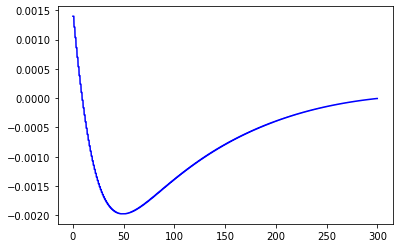

In [29]:
plt.plot(t[0:3000], U[0,0:3000], 'b-')


In [30]:
_,S_BR0 = sigma_b_r(s_BN0, s_RN)
print(S_BR[:,0], S_BR0)

[-0.77542077 -0.47386825  0.04307893] [-0.77542077 -0.47386825  0.04307893]


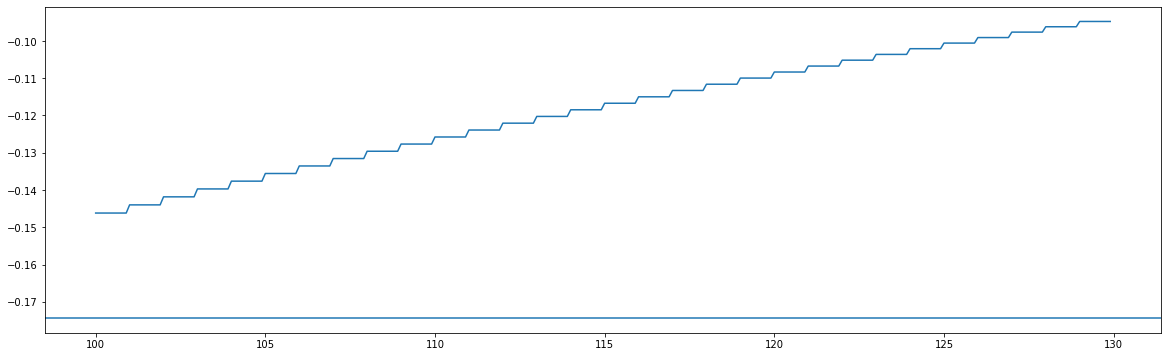

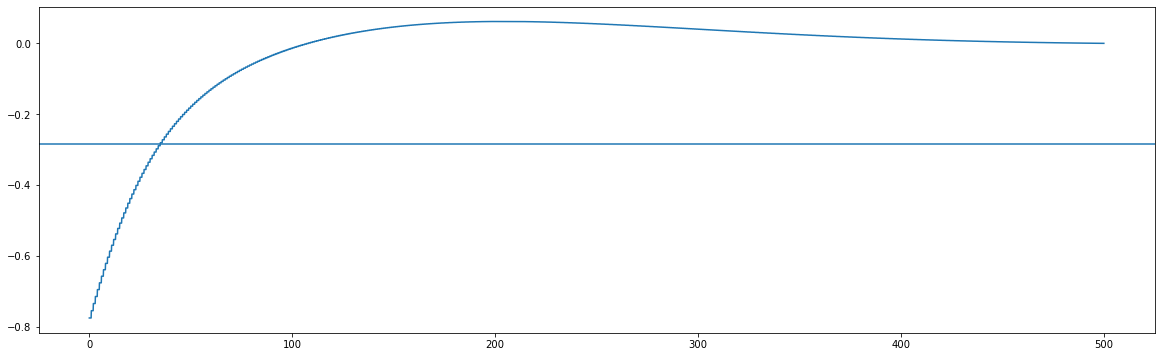

In [31]:
plt.figure(figsize = (20,6))
plt.plot(t[1000:1300], S_BR[1,1000:1300])
plt.axhline(S_BR0[1]/np.e)
plt.show()

plt.figure(figsize = (20,6))
plt.plot(t, S_BR[0,:])
plt.axhline(S_BR0[0]/np.e)

## Task 9: Nadir Pointing Control 

Next the nadir pointing attitude mode is created and tested. Use the same gains $K$ and $P$ as developed for sun-pointing, and the same PD control. Your tasks are:

1. Numerically implement the nadir pointing control mode and for now just assume that at $t_0$ nadir pointing is required, even though the satellite is in the sunlight at this time.

2.  Validate the response by providing the $\pmb\sigma_{B/N}$ states at $t = 15s$, $100s$, $200s$ and $400s$. Note that you must always provide the MRP corresponding to the short rotation.

In [32]:
I = np.diag([10, 5, 7.5]) 
s_BN0 = np.array([0.3, -0.4, 0.5])
B_w_BN0 = np.array([1.0, 1.75, -2.20])*np.pi/180 #in radians. Initial condition for w_BN
x0 = np.hstack((s_BN0, B_w_BN0)) # initial condition for state x
P= 0.16666666666666666
k = 0.005555555555555555
tspan = (0,500) # seconds


X_nadir,t,U_nadir, S_BR_nadir = control_simulation(xdot, tspan, x0, 'nadir', I)

In [33]:
print('MRP\'s at 15s, 100s 200s and 400s are: ')
print(X_nadir[0:3,150])
print(X_nadir[0:3,1000])
print(X_nadir[0:3,2000])
print(X_nadir[0:3, 4000])

MRP's at 15s, 100s 200s and 400s are: 
[ 0.29107835 -0.19123835  0.45350819]
[ 0.5661211  -0.13739225  0.1522067 ]
[ 0.79577465 -0.45980282 -0.12651499]
[-0.65283837  0.53489647  0.17461124]


## Task 10: GMO Pointing Control 

Next the GMO pointing attitude mode is created and test. Use the same gains K and P as developed for sun-pointing, and the smae PD control. Your tasks are:

1. Numerically implement the GMO pointing control mode and for now just assume that at t0 nadir pointing is required, even though the satellite is in the sunlight at this time.

2. Validate the response by providing the $\pmb\sigma_{B/N}$ states at $t = 15s$, $100s$, $200s$ and $400s$. Note that you must always provide the MRP corresponding to the short rotation.

In [34]:
I = np.diag([10, 5, 7.5]) 
s_BN0 = np.array([0.3, -0.4, 0.5])
B_w_BN0 = np.array([1.0, 1.75, -2.20])*np.pi/180 #in radians. Initial condition for w_BN
x0 = np.hstack((s_BN0, B_w_BN0)) # initial condition for state x
P= 0.16666666666666666
k = 0.005555555555555555
tspan = (0,500) # seconds


X_GMO,t,U_GMO, S_BR_GMO = control_simulation(xdot, tspan, x0, 'GMO', I)

In [35]:
print('MRP\'s at 15s, 100s 200s and 400s are: ')
print(X_GMO[0:3,150])
print(X_GMO[0:3,1000])
print(X_GMO[0:3,2000])
print(X_GMO[0:3, 4000])

MRP's at 15s, 100s 200s and 400s are: 
[ 0.26543648 -0.16878782  0.45949128]
[0.156142   0.22164113 0.34316237]
[0.08727568 0.11934993 0.31618681]
[ 0.00497196 -0.01648251  0.34238529]


[ 4.96227668e-03 -2.29568676e-02  3.47050130e-01  1.49109467e-04
 -1.00166899e-04  1.48166986e-04] [ 4.96227668e-03 -2.29568676e-02  3.47050130e-01  1.49109467e-04
 -1.00166899e-04  1.48166986e-04]


## Task 11  Mission Scenario Simulation

Finally you are ready to simulate the full on mission scenario. Use the initial spacecraft attitude and orbit conditions give before and Table 1, then propagate 6500 seconds to demonstrate how the attitude pointing performance of the nano-satellite as it enters different control modes. Your tasks are:

1. Numerically implement a login into your above simulation such that the satellite automatically computer the proper reference frame stages as it switches between sun-pointing, nadir-pointing and communication modes.

2. Validate the response by providing the $\pmb\sigma_{B/N}$ states at $t = 300s$, $2100s$, $3400s$, $4400s$ and $5600s$. Note that you must always provide the MRP corresponding to the short rotation.


In [41]:
import math
hLMO = 400
hGMO = 17028.010000000002
Omega_LMO, i_LMO, theta0_LMO = 20, 30, 60
Omega_GMO, i_GMO, theta0_GMO = 0, 0, 250

def angle(rLMO, rGMO):
    return math.acos(np.dot(rLMO,rGMO)/(norm(rLMO,2) * norm(rGMO,2)))*180/np.pi

T = 4000
R_LMO = np.zeros((3,6500))
R_GMO = np.zeros((3,6500))
angles = np.zeros(6500)
thetaLMO = np.zeros(6500)
thetaGMO = np.zeros(6500)
for t in range(0, 6500):
    pos_LMO, _ = pos_and_vel(hLMO, (Omega_LMO, i_LMO, theta0_LMO),t)
    pos_GMO, _ = pos_and_vel(hGMO, (Omega_GMO, i_GMO, theta0_GMO),t)
    R_LMO[:,t] = pos_LMO
    R_GMO[:,t] = pos_GMO
    angles[t] = angle(pos_LMO,pos_GMO)
    tdotLMO = theta_dot(hLMO)*t*180/np.pi + 60
    tdotGMO = theta_dot(hGMO)*t*180/np.pi + 250
    thetaLMO[t] = tdotLMO
    thetaGMO[t] = tdotGMO


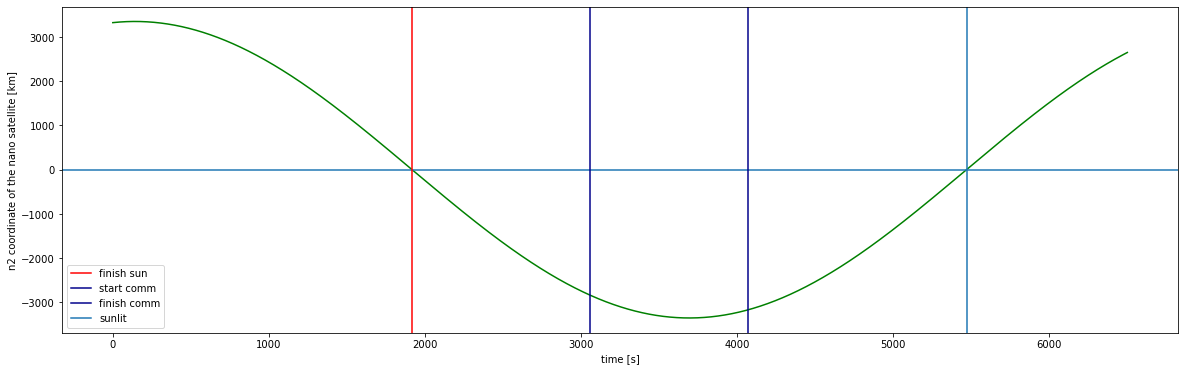

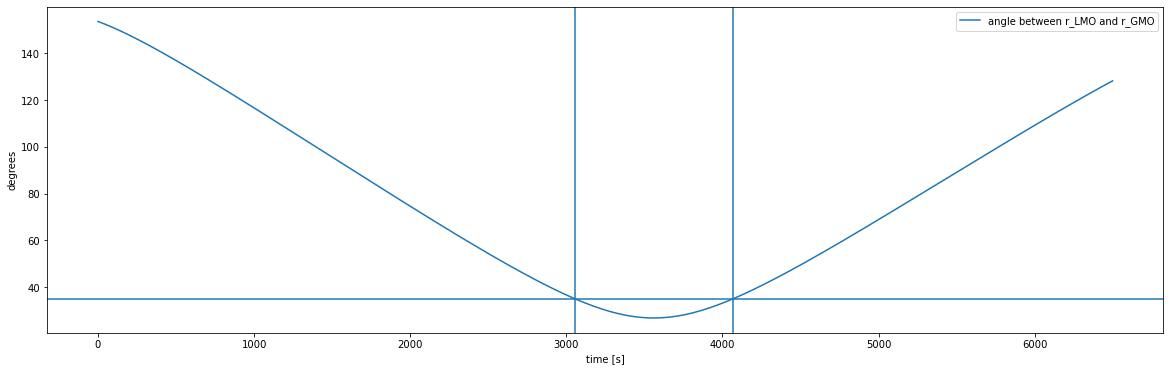

In [44]:
plt.figure(figsize = (20,6))
plt.plot(np.arange(0, 6500, 1), R_LMO[1,:], color = 'green')
#plt.plot(np.arange(0,6500, 1), R_GMO[1,:], color = 'red')
plt.axhline(0)
plt.axvline(1918, color = 'red', label='finish sun')
plt.axvline(3057, color = 'darkblue', label = 'start comm')
plt.axvline(4067, color= 'darkblue' ,label = 'finish comm')
plt.axvline(5469, label = 'sunlit')
plt.xlabel('time [s]')
plt.ylabel('n2 coordinate of the nano satellite [km]')
plt.legend()
plt.show()

plt.figure(figsize = (20,6))
plt.plot(np.arange(0,6500,1), angles, label = 'angle between r_LMO and r_GMO')
plt.xlabel('time [s]')
plt.ylabel('degrees')
plt.axhline(35)
plt.axvline(3057)
plt.axvline(4067)
plt.legend()
#plt.plot(np.arange(0, 6500, 1), np.abs(thetaLMO - thetaGMO), color = 'green')

### The functions above allow us to computes the times to swtich from power mode (sun pointing) to science mode (nadir pointing) and communication mode (GMO pointing)

In [45]:
def angle(v,w):
    a = math.acos(np.dot(v,w)/(norm(v)*norm(w)))*180/np.pi
    return a

def Is_sunlit(t):
    h = hLMO
    r, _ = pos_and_vel(h, (20,30,60),t)
    return r[1] >= 0

def comm_pos(t) :
    pos_lmo, _ = pos_and_vel(hLMO,(20,30, 60), t)
    pos_gmo, _ = pos_and_vel(hGMO, (0,0,250),t)
    return angle(pos_lmo, pos_gmo) <= 35

def switching_times():
    t = 0        
    while Is_sunlit(t) == True:
        t += 1
    tshade  = t
     
    tscience = tshade
    while not comm_pos(tscience) :
        tscience = tscience + 1
    
    tcom = tscience
    while comm_pos(tcom)==True and Is_sunlit(tcom)==False:
        tcom = tcom +1
        if tcom > 6500 :
            break
        
    if  Is_sunlit(tcom) == False:
        tscience2 = tcom
        while Is_sunlit(tscience2) == False :
            tscience2 += 1
            if tscience2 >6500 :
                break
    tsun = tscience2
    while Is_sunlit(tsun) ==True:
        tsun += 1
        if tsun> 6500:
            break
    
    return tshade, tscience, tcom, tscience2, tsun



In [46]:
t1,t2,t3,t4,t5 =intervals()
print(t1,t2,t3,t4,t5)

1918 3057 4067 5469 6501


In [186]:
a =np.eye(3)
b = np.zeros((3,5))
d = np.ones((3,3))

In [187]:
c = np.hstack((a,b,d))

In [188]:
print(c)

[[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [36]:
X, X_sun, X_nadir, X_comm, X_nadir2, X_sun2 = control_spacecraft()

In [38]:
X.shape

(6, 65000)

In [39]:
print('The MRP sigma_B/N states at t = 300s, 2100s, 3400s, 4400s and 5600s are: ')
print(X[0:3, 3000])
print(X[0:3,21000])
print(X[0:3,34000])
print(X[0:3,44000])
print(X[0:3,56000])

The MRP sigma_B/N states at t = 300s, 2100s, 3400s, 4400s and 5600s are: 
[-0.04422057 -0.73855063 -0.63065311]
[-0.74576509  0.11392308  0.15812376]
[0.01317172 0.03979947 0.39069348]
[-0.43314942 -0.73234532 -0.18772896]
[-0.00116637 -0.82595224 -0.50443262]
